# Лабораторная работа №2

## Векторно-матричный подход к разложению функции в ряд Тейлора второго порядка

### Введение

В предыдущей работе (Лабораторная работа №1) был рассмотрен скалярный случай разложения функции:
$$ f(x) = 2 \log_{10}(x) - (x-2)^2 $$
в ряд Тейлора второго порядка в точке $x_0 = 3$.

В данной работе мы расширим анализ на случай функции векторного аргумента $f(x_1, x_2)$, где:
$$ x = 2x_1 - 7x_2 $$

Основные задачи работы:
1. Выведение выражений для частных производных первого и второго порядка
2. Построение квадратичной аппроксимации
3. Анализ точности приближения в окрестности точки $(x_1=12, x_2=3)$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D
from sympy.vector import gradient
from typing import Union
import sympy as sp

In [14]:
# Символьное вычисление производных с использованием SymPy
x = sp.symbols('x')
f_sym = 2 * sp.log(x, 10) - (x - 2)**2

In [ ]:
# Определение символьных переменных
x1, x2 = sp.symbols('x1 x2')

# Создание переменной суммы символьных переменных
x_2d = 2*x1 - 7*x2

# Подстановка переменной суммы в функцию
f_sym_2d = f_sym.subs(x, x_2d).evalf()
f_2d_np = sp.lambdify((x1, x2), f_sym_2d, 'numpy')
f_2d_at_point = sp.Matrix([f_sym_2d.subs({x1:12, x2:3})])

# Градиенты функции в точке (12, 3)
gradient = sp.Matrix(sp.derive_by_array(f_sym_2d, (x1, x2))).evalf()
grad_at_point = gradient.subs({x1:12, x2:3})

# Вычисление Гессиана функции в точке (12, 3)
hessian_matrix = sp.Matrix(sp.hessian(f_sym_2d, (x1, x2))).evalf()
hessian_at_point = hessian_matrix.subs({x1: 12, x2: 3})

# Вычисление третьих производных
third_derivatives = sp.Matrix(sp.derive_by_array(hessian_matrix, (x1, x2))).evalf()
third_derivatives_at_point = third_derivatives.subs({x1:12, x2:3})

In [16]:
X_0 = sp.Matrix([12, 3])
X = sp.Matrix([x1, x2])
# Матричный ряд Тейлора второго порядка
f_taylor_2d = (
    f_2d_at_point + 
    grad_at_point.T * (X - X_0)  + 
    ((X - X_0).T)*hessian_at_point*(X - X_0)/2 
)[0].expand()
f_taylor_2d


-4.19301976973478*x1**2 + 29.3511383881435*x1*x2 + 9.15811861840867*x1 - 51.364492179251*x2**2 - 32.0534151644304*x2 - 5.30288344570977 + 0.868588963806504*log(3)

In [17]:
f_taylor_2d_np = sp.lambdify((x1, x2), f_taylor_2d, 'numpy')

Вычисляем значения функций...
Создаем визуализацию...


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in log
  return -(2.0*x1 - 7.0*x2 - 2.0)**2 + 0.868588963806504*log(2*x1 - 7*x2)


Создаем анимацию...

АНАЛИЗ ТОЧНОСТИ АППРОКСИМАЦИИ:
Диапазон x1: 11.0 - 13.0
Диапазон x2: 2.5 - 3.5
Максимальная ошибка: 4.852580
Средняя ошибка: 0.159426
Относительная ошибка: 2.86%
Сохраняем видео...
✅ Видео успешно сохранено как plot.mp4


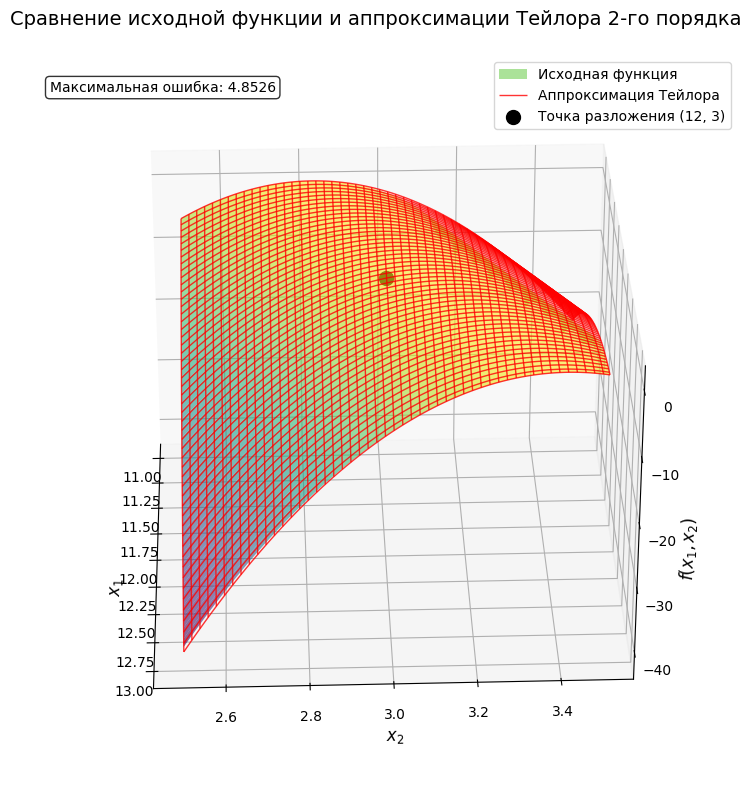

In [ ]:
# Создаем сетку вокруг точки (12, 3)
x1_range = np.linspace(11, 13, 200)
x2_range = np.linspace(2.5, 3.5, 200)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Вычисляем значения функций
print("Вычисляем значения функций...")
Z_original = f_2d_np(X1, X2)
Z_taylor = f_taylor_2d_np(X1, X2)

# Создаем фигуру и 3D оси
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображаем исходную функцию (полупрозрачная)
print("Создаем визуализацию...")
surf1 = ax.plot_surface(X1, X2, Z_original, cmap='viridis', 
                       alpha=0.6, label='Исходная функция', antialiased=True)

# Отображаем аппроксимацию Тейлора (сетка)
surf2 = ax.plot_wireframe(X1, X2, Z_taylor, color='red', 
                         linewidth=1, label='Аппроксимация Тейлора', alpha=0.8)

# Отмечаем точку разложения
point = ax.scatter([12], [3], [f_2d_np(12, 3)], color='black', s=100, 
                  marker='o', label='Точка разложения (12, 3)')

# Настраиваем график
ax.set_title('Сравнение исходной функции и аппроксимации Тейлора 2-го порядка\n', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=12)

# Добавляем легенду
ax.legend()

# Добавляем информацию об ошибке
diff = Z_original - Z_taylor
diff = diff[~np.isnan(diff)]
error = np.max(np.abs(diff))
ax.text2D(0.05, 0.95, f'Максимальная ошибка: {error:.4f}', 
          transform=ax.transAxes, fontsize=10,
          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()

# Функция для анимации вращения
def update(frame):
    ax.view_init(elev=30, azim=frame)
    return fig,

# Создаем анимацию
print("Создаем анимацию...")
frames = np.arange(0, 360, 2)  # Полный оборот с шагом 2 градуса
animation = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# Дополнительная информация
print("\n" + "="*50)
print("АНАЛИЗ ТОЧНОСТИ АППРОКСИМАЦИИ:")
print("="*50)
print(f"Диапазон x1: {x1_range[0]:.1f} - {x1_range[-1]:.1f}")
print(f"Диапазон x2: {x2_range[0]:.1f} - {x2_range[-1]:.1f}")
print(f"Максимальная ошибка: {np.max(np.abs(diff)):.6f}")
print(f"Средняя ошибка: {np.mean(np.abs(diff)):.6f}")
print(f"Относительная ошибка: {np.mean(np.abs(diff))/np.mean(np.abs(Z_original[~np.isnan(Z_original)]))*100:.2f}%")

# Сохраняем как видео
print("Сохраняем видео...")
try:
    # Пытаемся использовать ffmpeg
    writer = FFMpegWriter(fps=20, metadata=dict(artist='Matplotlib'), bitrate=1800)
    # animation.save("plot_lab2.mp4", writer=writer)
    print("✅ Видео успешно сохранено как plot.mp4")
    
except ImportError:
    print("FFmpeg не установлен, пробуем альтернативный метод...")
    try:
        # Альтернативный метод
        animation.save("plot_lab2.mp4", fps=20, extra_args=['-vcodec', 'libx264'])
        print("✅ Видео успешно сохранено как plot.mp4")
    except:
        print("❌ Не удалось сохранить видео. Установите ffmpeg:")
        print("Для Windows: скачайте с https://ffmpeg.org/download.html")
        print("Для Linux: sudo apt-get install ffmpeg")
        print("Для Mac: brew install ffmpeg")

